<a href="https://colab.research.google.com/github/maxmussavian/euler-spiral/blob/main/euler_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import sympy as spy
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import numpy as np

In [86]:
t, s = spy.symbols('t s')

In [87]:
def x_func(lower, upper, func):
  def integrand(t):
    return np.cos(func(t))
  result, _ = integrate.quad(integrand, lower, upper)
  return result

In [88]:
def y_func(lower, upper, func):
  def integrand(t):
    return np.sin(func(t))
  result, _ = integrate.quad(integrand, lower, upper)
  return result

In [89]:
def x_y_coordinates(delta_x, delta_y, func, s_steps):
  x_values_pos = np.cumsum([delta_x(l, u, func) for l, u in zip(s_steps[:-1], s_steps[1:])])  
  y_values_pos = np.cumsum([delta_y(l, u, func) for l, u in zip(s_steps[:-1], s_steps[1:])])
  x_values_neg = np.flip(np.cumsum([delta_x(l, u, func) for l, u in zip(-s_steps[:-1], -s_steps[1:])]))
  y_values_neg = np.flip(np.cumsum([delta_y(l, u, func) for l, u in zip(-s_steps[:-1], -s_steps[1:])]))

#  x_values_pos = np.asarray([delta_x(l, u, func) for l, u in zip(s_steps[:-1], s_steps[1:])])  
#  y_values_pos = np.asarray([delta_y(l, u, func) for l, u in zip(s_steps[:-1], s_steps[1:])])
#  x_values_neg = np.flip(np.asarray([delta_x(l, u, func) for l, u in zip(-s_steps[:-1], -s_steps[1:])]))
#  y_values_neg = np.flip(np.asarray([delta_y(l, u, func) for l, u in zip(-s_steps[:-1], -s_steps[1:])]))

  return (
     np.concatenate([np.flip(-s_steps[1:]), s_steps[1:]]),
     np.concatenate([x_values_neg, x_values_pos]), 
     np.concatenate([y_values_neg, y_values_pos])
  ) 

In [90]:
start = 1e-6
end = 10
steps = 500
s_steps = np.linspace(start, end, steps)

# Euler Spiral

In [91]:
k = s
spy.integrate(k, s)

s**2/2

In [92]:
def func_euler(x):
    return 0.5 * np.power(x, 2)

In [93]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_euler, s_steps)

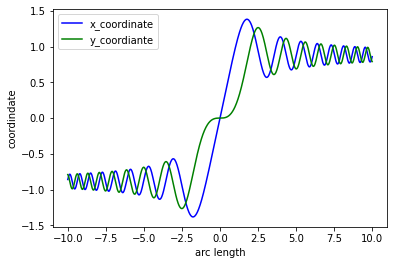

In [94]:
fig, ax = plt.subplots(1, 1)
ax.plot(arc_length, x_coord, 'b', label='x_coordinate')
ax.plot(arc_length, y_coord, 'g', label='y_coordiante')
ax.set_xlabel('arc length')
ax.set_ylabel('coordindate')
_ = ax.legend()

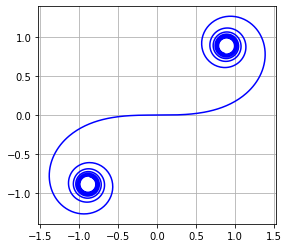

In [95]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()

# Polynomial with circle

In [96]:
k = s ** 2 - 2.19
spy.integrate(k, s)

0.333333333333333*s**3 - 2.19*s

In [97]:
def func_2(x):
  return np.power(x, 3) / 3. - 2.19 * x

In [98]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_2, s_steps)

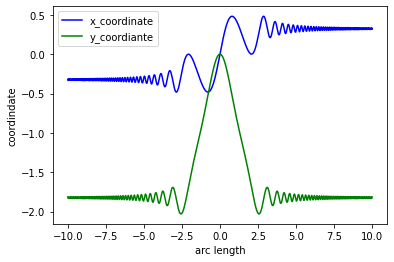

In [99]:
fig, ax = plt.subplots(1, 1)
ax.plot(arc_length, x_coord, 'b', label='x_coordinate')
ax.plot(arc_length, y_coord, 'g', label='y_coordiante')
ax.set_xlabel('arc length')
ax.set_ylabel('coordindate')
_ = ax.legend()

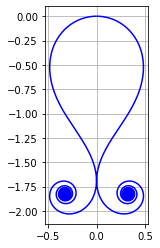

In [100]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()

# Function 3

In [101]:
k = 5 * s ** 4 - 18 * s ** 2 + 5
spy.integrate(k, s)

s**5 - 6*s**3 + 5*s

In [102]:
def func_3(x):
  return np.power(x, 5) - 6. * np.power(x, 3) + 5 * x

In [103]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_3, s_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  after removing the cwd from sys.path.


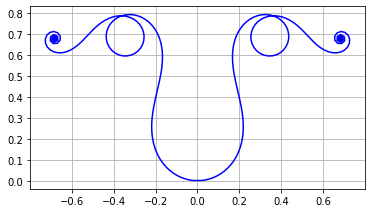

In [104]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()

# Exponential

In [105]:
k = spy.exp(s)
spy.integrate(k, s)

exp(s)

In [106]:
def func_4(x):
  return np.exp(x)

In [107]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_4, s_steps)

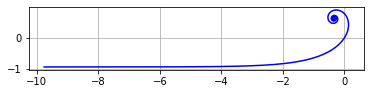

In [108]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()

# Trigonemtric Functions

In [109]:
k = spy.cos(s) - s * spy.sin(s)
spy.integrate(k, s)

s*cos(s)

In [110]:
def func_4(x):
  return x * np.cos(x)

In [111]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_4, np.linspace(1e-6, 30, steps))

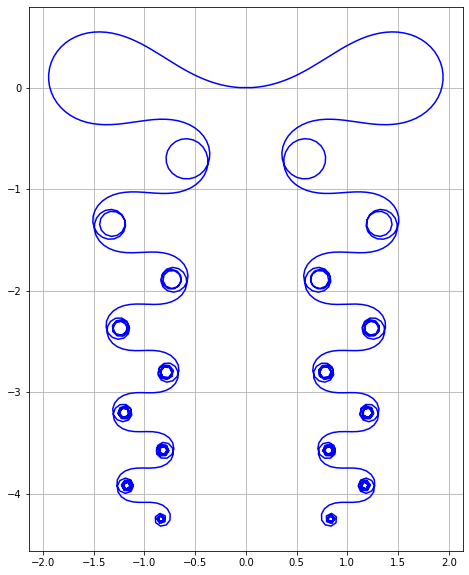

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()

In [113]:
k = s ** 2 + s * spy.cos(2 * spy.pi * s) 
spy.integrate(k, s)

s**3/3 + s*sin(2*pi*s)/(2*pi) + cos(2*pi*s)/(4*pi**2)

In [114]:
def func_5(x):
  return np.power(x, 3)

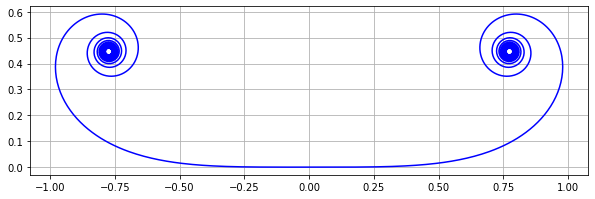

In [115]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_5,  np.linspace(1e-6, 5, steps))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()

In [116]:
k = spy.cosh(s) - 5.19
spy.integrate(k, s)

-5.19*s + sinh(s)

In [117]:
def func_6(x):
  return   np.sinh(x) - 5.19 * x

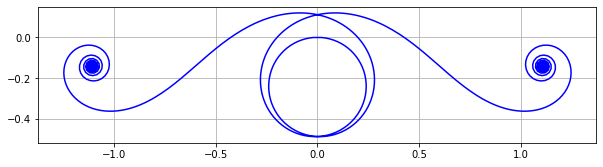

In [118]:
arc_length, x_coord, y_coord = x_y_coordinates(x_func, y_func, func_6, np.linspace(1e-6, 10, steps))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(x_coord, y_coord, 'b')
ax.set_aspect('equal')
ax.grid()